# Lab 2: Regression

This lab is designed to challenge you to apply existing knowledge from previous lectures into real-world practices. We will be writing codes to run two of machine learning's most used algorithms: Linear and Logistic Regression. You might encounter some errors early, so don't start late!


### Instructions
1. For Linear Regression try solving the equations from scratch. If you use any library to do the regression (like LinearRegression from sklearn) you only be graded out of 10.

2. Make sure all plots, outputs and intermediate results are visible in the final pdf that you submit.

### Submission guide
Save a copy as UniqueID_Lab2.ipynb and submit the file to Canvas, or a link to the file is ok. Make sure it is shared.

In [143]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# library for responsive graphs


%matplotlib inline

## Q1: Linear Regression (15pts)

We will use this Abalone dataset shared by Nima Pourmoradi for linear regression.

https://www.kaggle.com/datasets/nimapourmoradi/abalones-age

In [144]:
# TODO: Import and read the dataset.
# this dataset can be loaded directly using seaborn or pandas. Do some research.

df = pd.read_csv('abalone.data.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Now that you have successfully import and read the dataset, take some time to understand the entire structure, focusing on each feature and the target variable (quality score? another kind of metric?)

In [145]:
# uncomment these to learn more about the dataset
df.info()
df.describe()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         4177 non-null   object 
 1   Length                      4177 non-null   float64
 2   Diameter                    4177 non-null   float64
 3   Height                      4177 non-null   float64
 4   Whole weightShucked weight  4177 non-null   float64
 5   Viscera weight              4177 non-null   float64
 6   Shell weight                4177 non-null   float64
 7   Rings                       4177 non-null   float64
 8   Age                         4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weightShucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')


### Visualizing the data

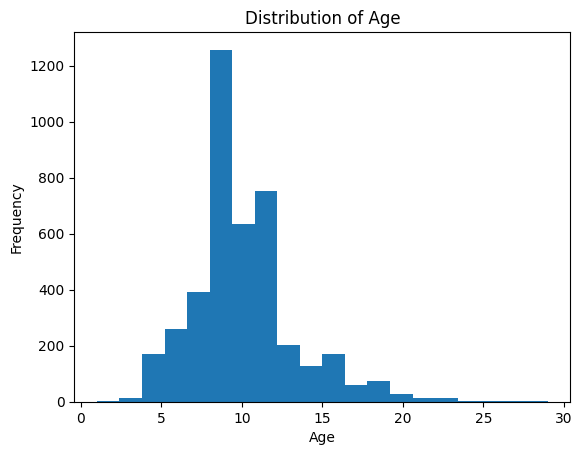

In [146]:
# TODO: Plot a histogram showing the distribution of Age.

df['Age'].hist(bins=20, grid=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Cleaning the data

In [147]:
# TODO: Rename the long column name to make plotting easier
# The error concatenated two column names together, rename to something more appropriate

# I have renamed all the columns to snake case for consistency.
column_names = {
    'Sex': 'sex', 
    'Length': 'length',
    'Diameter': 'diameter',
    'Height': 'height', 
    'Whole weightShucked weight': 'whole_weight_shucked_weight',
    'Length': 'length',
    'Viscera weight': 'viscera_weight',
    'Shell weight': 'shell_weight',
    'Rings': 'rings',
    'Age': 'age'
}

df = df.rename(columns=column_names)
df.head()

,sex,length,diameter,height,whole_weight_shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Splitting the data

<Axes: >

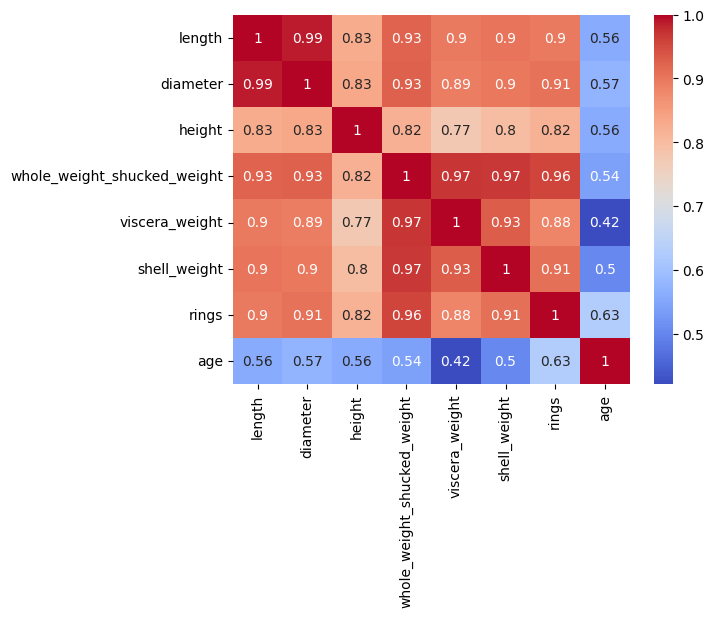

In [148]:
# TODO: Plot a heatmap showing the correlation matrix for the dataframe
# Only consider numerical data (no objects like dates or strings)
# It can help assess whether there is a linear distribution in the dataset

import seaborn as sns

#plot heatmap of only numerical data
sns.heatmap(df.select_dtypes(include=['float', 'int']).corr(), annot=True, cmap='coolwarm')


In [149]:
# TODO: We will try to predict the size of the abalone's rings
# So your dependent variable (y) is 'Rings'
# Choose an appropriate independent variable (x)
# Explain your reasoning behind your choice

X = df['whole_weight_shucked_weight']
y = df['rings']

# Since whole_weight_shucked_weight has the highest correlation with Rings
# I have chosen to use it as the independent variable

In [150]:
# TODO: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train the Linear Regression Model

In [151]:
# TODO: Write the regression formula and calculate b0 and b1
mean_x_train = np.mean(X_train)
mean_y_train = np.mean(y_train)

x_minus_x_mean = X_train - mean_x_train
y_minus_y_mean = y_train - mean_y_train

b1 = np.sum(x_minus_x_mean * y_minus_y_mean) / np.sum(x_minus_x_mean ** 2)
b0 = mean_y_train - b1 * mean_x_train

print("b0 = ", b0)
print("b1 = ", b1)


b0 =  0.015134569588102942
b1 =  0.2699321112120841


Text(0.5, 1.0, 'Scatter Plot and Regression Line')

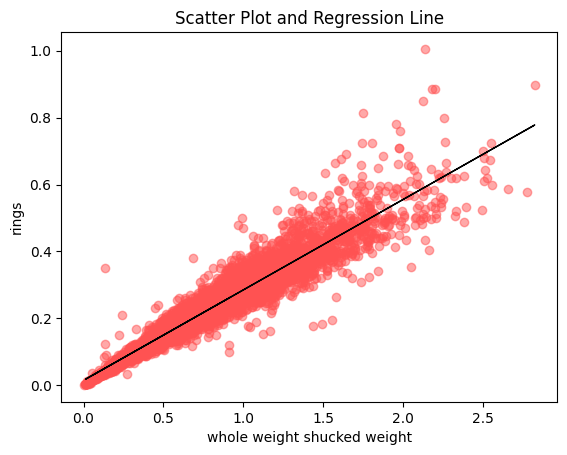

In [152]:
# TODO: Plot a scatter plot of (x,y) and also plot the regression line
y_test_pred = b0 + b1 * X_test
plt.scatter(X, y, c='#FF5252', alpha=0.5)

# Plot the regression line
plt.plot(X_test, y_test_pred, c='black', linewidth=1)
plt.xlabel("whole weight shucked weight")
plt.ylabel("rings")
plt.title("Scatter Plot and Regression Line")

### Evaluate the model

In [153]:
# TODO: What is the RMSE for test predictions? What is the R-square accuracy?
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
rsquared = 1 - (np.var(y_test - y_test_pred) / np.var(y_test))

print(f"RMSE: {rmse} \nR-Squared: {rsquared}")

RMSE: 0.0362905519434083 
R-Squared: 0.9290027519454723


## Q2: Logistic Regression (15pts)

We will use [Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data), which is included in scikit-learn library for logistic regression analysis.

This dataset provides measurements from digitized images of breast mass collected from patients. The goal is to classify the observations into 2 categories: malignant (cancerous) or benign (non-cancerous). There are 30 numerical features present in the images. The target variable is binary, making it suitable for logistic regression tasks.

In [154]:
# TODO: Import and load the dataset. Do the research
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
print(breast_cancer_data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [155]:
# TODO: convert the dataset into a pandas dataframe
# Question: Why converting into a DataFrame? What's the benefits?
df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['label'] = breast_cancer_data.target

# The libraries that we are going to use such as numpy, pandas, matplotlib etc support dataframes
# so we are converting the data to dataframes.

# The benefits of converting data into a dataframe are:
# 1. Using DFs with libraries such as numpy and pandas make it easy to perform math calculations,
#    manipulating data (like filtering etc).
# 2. It is easy to apply ML algorithms in dataframes.

### Visualizing the data

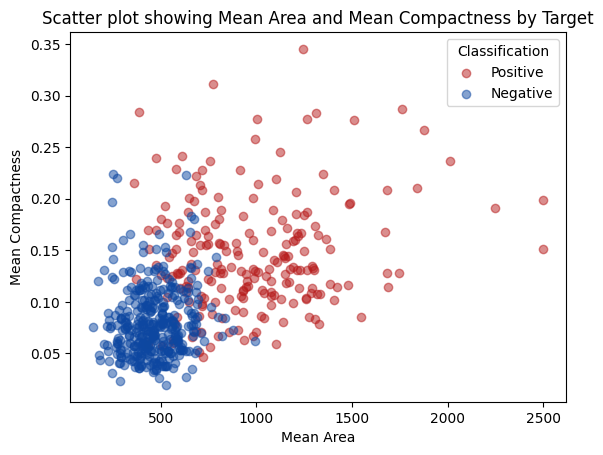

In [156]:
# TODO: Plot a scatter plot for 2 features and the label
# Add a legend so the plot is readable
# Features: Mean Area and Mean Compactness

df_target_0 = df[df["label"] == 0]
df_target_1 = df[df["label"] == 1]

plt.scatter(df_target_0["mean area"], df_target_0["mean compactness"], color='#B71C1C', alpha=0.5, label="Positive")
plt.scatter(df_target_1["mean area"], df_target_1["mean compactness"], color='#0D47A1', alpha=0.5, label="Negative")
plt.xlabel("Mean Area")
plt.ylabel("Mean Compactness")
plt.title("Scatter plot showing Mean Area and Mean Compactness by Target")

# Add legend
plt.legend(title="Classification")
plt.show()


### Data Preprocessing

In [157]:
# TODO: Consider only averages features for out task
# Drop all feature columns except the average (or mean) features
# How many features do we have now?


df_mean_only = df.filter(regex='mean')
print(df_mean_only.head())

print(f"There are {df_mean_only.shape[1]} features in the dataset")

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  
0                 0.07871  
1                 0.05667  
2       

### Splitting the Data

In [158]:
# To train the data, we first need to prepare the data
# TODO: Make the train-test split

y = df['label']
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training

In [159]:
# Now we can train a logistic regression model on the training data
# TODO: Make a pandas dataframe for the training dataset including the labels
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)


# Scale the data as I got a warning message saying that the result was not converging

In [160]:
# TODO: Use the logistic regression function from sklearn library to train the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train.values.ravel())


LogisticRegression(max_iter=3000)

### Evaluation

In [161]:
# TODO: Predict the y values for the test dataset
y_pred = model.predict(X_test)

In [162]:
# TODO: Calculate the accuracy, precision, and recall scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")

Accuracy: 0.9473684210526315
Precision: 0.9841269841269841
Recall: 0.9253731343283582


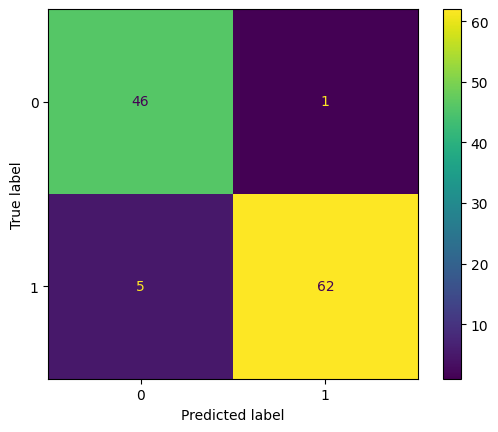

In [164]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()